# Do IPAs Really Taste Better??

## Introduction:
The craft beer industry in the US has grown tremendously over the past decade. Of the types of beer that are new to the market, India Pale Ales (IPAs) seem to be the most popular. IPAs are known for their bold, bitter and hoppy taste, and while many fanatics can't get enough of this unique taste, the IPA critics are driven away by those exact features. This project aims to analyze the popularity of IPA's taste using a beer review dataset.

### Dataset:
The dataset utilized for this analysis is the "Beer Profile and Ratings Data Set" (beer_profile_and_ratings.csv).  
The following information is posted on the Kaggle page where the dataset is located. (The link to full description and information: https://www.kaggle.com/ruthgn/beer-profile-and-ratings-data-set)

Below is an overview/summary description of the dataset.

This data set contains tasting profiles and consumer reviews for 3197 unique beers from 934 different breweries. It was created by integrating information from two existing data sets on Kaggle:  
**Beer Tasting Profiles Dataset**  
**1.5 Million Beer Reviews**

In [77]:
# Load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Read dataset and inspect first few rows:

In [78]:
data = pd.read_csv('beer_profile_and_ratings.csv')

In [79]:
data.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


Look at the columns/features of this dataset:

In [80]:
data.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [81]:
print(data.columns)

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


Verify that there are 3197 beer profiles in this dataset as stated in the description from the source.

In [82]:
print(data.shape)

(3197, 25)


### Drilling down

Since we want to analyze the taste of IPA compared to other styles of beer, we first need to see all varieties of beer styles included in this dataset.

In [83]:
data['Style'].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

As we can see above, the styles of beer are listed with their broad category, followed by a sub-style.  
For the purpose of this analysis, we are considering IPA at its broad category level. All sub-styles of IPA (American, English, Imperial) are considered IPAs.

Here we extract the broad category by getting the first element (before '-').

In [84]:
data['Style Category'] = data['Style'].str.rsplit(pat=' - ', expand=True)[0]

Then we look again at all values of broad category.

In [85]:
data['Style Category'].unique()

array(['Altbier', 'Barleywine', 'Bitter',
       'Bière de Champagne / Bière Brut', 'Blonde Ale', 'Bock', 'Braggot',
       'Brett Beer', 'Brown Ale', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel', 'Farmhouse Ale',
       'Fruit and Field Beer', 'Gruit / Ancient Herbed Ale', 'Happoshu',
       'Herb and Spice Beer', 'IPA', 'Kvass', 'Kölsch', 'Lager', 'Lambic',
       'Low Alcohol Beer', 'Mild Ale', 'Old Ale', 'Pale Ale', 'Pilsner',
       'Porter', 'Pumpkin Beer', 'Quadrupel (Quad)', 'Red Ale',
       'Rye Beer', 'Scotch Ale / Wee Heavy', 'Scottish Ale',
       'Smoked Beer', 'Sour', 'Stout', 'Strong Ale', 'Tripel',
       'Wheat Beer', 'Wild Ale', 'Winter Warmer'], dtype=object)

Check if there are any NaN values in the review_taste column, as we will focus on the analysis of this value.

In [86]:
data['review_taste'].isnull().values.any()

False

No NaN values in the review_taste column.

Since we are particularly interested in IPAs, we can look at a distribution of taste reviews for all IPAs.

<AxesSubplot:>

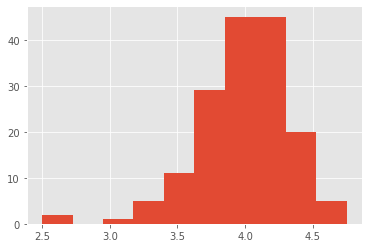

In [87]:
data[data['Style Category'] == 'IPA']['review_taste'].hist()

Most taste reviews for IPAs are at around 4, with some low tail between 2.5 and 3.5.

Find average taste review of each style category.

In [88]:
style_taste_review_avg = data.groupby(by='Style Category')['review_taste'].mean() \
                             .rename('review_taste_avg') \
                             .reset_index() \
                             .sort_values(by='review_taste_avg', ascending=False) \
                             .reset_index(drop = True)

Display the average taste review by style category in descending order

In [89]:
style_taste_review_avg

,Style Category,review_taste_avg
0,Wild Ale,4.307302
1,Quadrupel (Quad),4.092860
2,Old Ale,4.065665
3,Brett Beer,4.055154
4,Barleywine,4.043089
5,Lambic,4.012533
6,Bière de Champagne / Bière Brut,3.987819
7,IPA,3.975293
8,Scotch Ale / Wee Heavy,3.975291
9,Tripel,3.974192


From the above list, we can see the rank of **average taste review of IPA is 8th with an average taste review of 3.98**, after many other style categories. Wile Ale appears to be "the tastiest" style category with an average taste review of 4.30.

Get top 10 best tasting beer style category

In [90]:
top10_style = style_taste_review_avg.iloc[:10]
top10_style

,Style Category,review_taste_avg
0,Wild Ale,4.307302
1,Quadrupel (Quad),4.092860
2,Old Ale,4.065665
3,Brett Beer,4.055154
4,Barleywine,4.043089
5,Lambic,4.012533
6,Bière de Champagne / Bière Brut,3.987819
7,IPA,3.975293
8,Scotch Ale / Wee Heavy,3.975291
9,Tripel,3.974192


Next, we can create a visualizatoin of the above information and **highlight IPA's spot (in orange)** in the top 10 beer style categories.

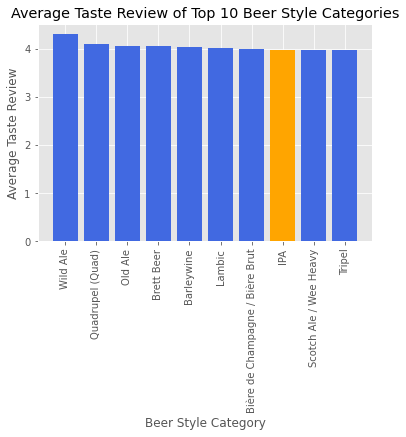

In [97]:
x = top10_style['Style Category']
review_taste_avg = top10_style['review_taste_avg']

x_pos = [i for i, _ in enumerate(x)]

color_list = ['royalblue']*7 + ['orange'] + ['royalblue']*3
plt.bar(x_pos, review_taste_avg, color=color_list)
plt.xlabel("Beer Style Category")
plt.ylabel("Average Taste Review")
plt.title("Average Taste Review of Top 10 Beer Style Categories")

plt.xticks(x_pos, x, rotation = 90)

plt.show()

IPA certainly ranks high (at 8th place) among all beer styles in terms of taste. However, it appears that IPA's taste still doesn't beat that of some of the more traditional beer styles.

Interestingly, the beers that rank higher in terms of taste than IPA **seem to (by definition) have higher alcohol content**. To see if this is true, we can see if the average alcohol by volume (ABV) of these style categories are higher than IPA.

In [101]:
style_abv_avg = data.groupby(by='Style Category')['ABV'].mean() \
                             .rename('abv_avg') \
                             .reset_index() \
                             .sort_values(by='abv_avg', ascending=False) \
                             .reset_index(drop = True)
style_abv_avg

,Style Category,abv_avg
0,Barleywine,11.208438
1,Quadrupel (Quad),10.785294
2,Bière de Champagne / Bière Brut,10.062500
3,Old Ale,9.190000
4,Tripel,9.100000
5,Strong Ale,9.066959
6,Wild Ale,8.504783
7,Bock,8.305290
8,Scotch Ale / Wee Heavy,8.140000
9,Braggot,8.075000


In this list, we see many overlapping style categories in the top ranking spots with the taste ranking.  
Specifically, **Barleywine, Quadrupel, Bière de Champagne / Bière Brut, Old Ale, Wild Ale** all have higher contents than IPA. These also ranked higher in taste than IPA.

In [96]:
abv_ipa_comp = style_abv_avg[:13]
abv_ipa_comp

,Style Category,abv_avg
0,Barleywine,11.208438
1,Quadrupel (Quad),10.785294
2,Bière de Champagne / Bière Brut,10.062500
3,Old Ale,9.190000
4,Tripel,9.100000
5,Strong Ale,9.066959
6,Wild Ale,8.504783
7,Bock,8.305290
8,Scotch Ale / Wee Heavy,8.140000
9,Braggot,8.075000


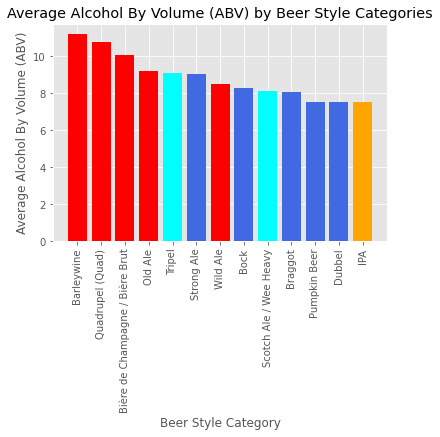

In [105]:
x = abv_ipa_comp['Style Category']
abv_avg = abv_ipa_comp['abv_avg']

x_pos = [i for i, _ in enumerate(x)]

color_list = ['red']*4 + ['cyan'] + ['royalblue'] + ['red'] + ['royalblue']+['cyan']+['royalblue']*3 + ['orange']
plt.bar(x_pos, abv_avg, color=color_list)
plt.xlabel("Beer Style Category")
plt.ylabel("Average Alcohol By Volume (ABV)")
plt.title("Average Alcohol By Volume (ABV) by Beer Style Categories")

plt.xticks(x_pos, x, rotation = 90)

plt.show()

As we can see above, 5 beer style categories (red) that ranked higher in taste than IPA (Barleywine, Quadrupel, Bière de Champagne / Bière Brut, Old Ale, and Wild Ale) also have higher averge ABV than IPA.  
On the other hand, there are 2 beer styles (cyan) with higher average ABV that ranked lower in taste than IPA (Tripel, Scotch Ale / Wee Heavy).

The fact that there are 8 out of the top 10 beer categories in terms of taste among the highest ABV beer categories suggests that taste could be correlated with ABV.  
Perhaps beer drinkers collectively tend to prefer the taste of strong (high ABV) beers.  

## Conclusion:
**IPA seems to be a very popular beer category lately, and analysis looked into the tastiness of IPA compared to other beer categories. In doing so, a potential feature that seems to be associated with tastiness was identifies: alcohol content.**  

More analysis is needed to identify if there are other features/metrics associated with a beer being rated highly in tastiness.  

Some possible future analysis includes correlation analysis between each feature of all beer categories.